In [ ]:
# Load the dataset
import pandas as pd
file_path = '/content/uncleaned_study_grades.csv'
df = pd.read_csv(file_path)
df

Student Studied_hours  Grade Participation  Attendance
0    Naman            25     10          High          90
1    Ankit             7      7           Low          65
2    Palak           Ten      8        Medium          80
3     Ramu            15    101           Low          60
4    Karan            18      9        Medium          85
5   Shreya            12      8          High          92
6     Amit             5      6           Low          50
7     Neha            30     10          High          95
8   Simran        Twenty     11        Medium          88
9    Vikas            40     10          High         100
10   Rahul            -5      0           Low          40
11   Priya             0      5           Low          30

In [ ]:
# Convert 'Studied_hours' to numeric, replacing invalid values
df['Studied_hours'] = pd.to_numeric(df['Studied_hours'], errors='coerce')  # Convert invalid to NaN
df['Studied_hours'].fillna(df['Studied_hours'].median(), inplace=True)     # Replace NaN with median
df = df[df['Studied_hours'] >= 0]  # Remove negative values
df

<ipython-input-43-11a21c343b75>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Studied_hours'].fillna(df['Studied_hours'].median(), inplace=True)     # Replace NaN with median


Student  Studied_hours  Grade Participation  Attendance
0    Naman           25.0     10          High          90
1    Ankit            7.0      7           Low          65
2    Palak           13.5      8        Medium          80
3     Ramu           15.0    101           Low          60
4    Karan           18.0      9        Medium          85
5   Shreya           12.0      8          High          92
6     Amit            5.0      6           Low          50
7     Neha           30.0     10          High          95
8   Simran           13.5     11        Medium          88
9    Vikas           40.0     10          High         100
11   Priya            0.0      5           Low          30

In [ ]:
# Ensure 'Grade' is between 0 and 10
df['Grade'] = df['Grade'].clip(0, 10)


<ipython-input-44-85065abd44cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grade'] = df['Grade'].clip(0, 10)


In [ ]:
# Clean 'Participation' column
valid_participation = ['High', 'Medium', 'Low']
df['Participation'] = df['Participation'].where(df['Participation'].isin(valid_participation), 'Medium')

<ipython-input-45-ae4e18c8ac0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Participation'] = df['Participation'].where(df['Participation'].isin(valid_participation), 'Medium')


In [ ]:
df

Student  Studied_hours  Grade Participation  Attendance
0    Naman           25.0     10          High          90
1    Ankit            7.0      7           Low          65
2    Palak           13.5      8        Medium          80
3     Ramu           15.0     10           Low          60
4    Karan           18.0      9        Medium          85
5   Shreya           12.0      8          High          92
6     Amit            5.0      6           Low          50
7     Neha           30.0     10          High          95
8   Simran           13.5     10        Medium          88
9    Vikas           40.0     10          High         100
11   Priya            0.0      5           Low          30

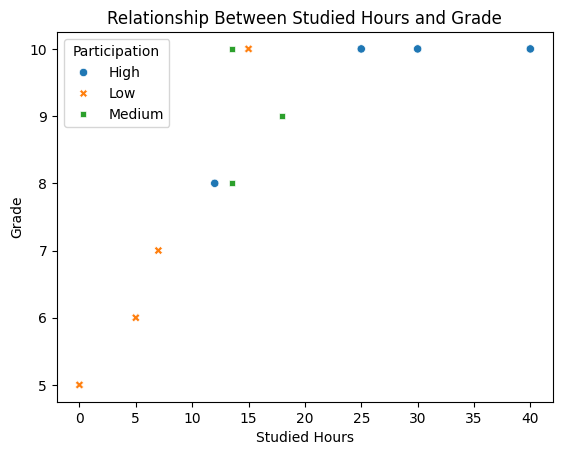

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Studied_hours', y='Grade', hue='Participation', style='Participation')
plt.title('Relationship Between Studied Hours and Grade')
plt.xlabel('Studied Hours')
plt.ylabel('Grade')
plt.legend(title='Participation')
plt.show()


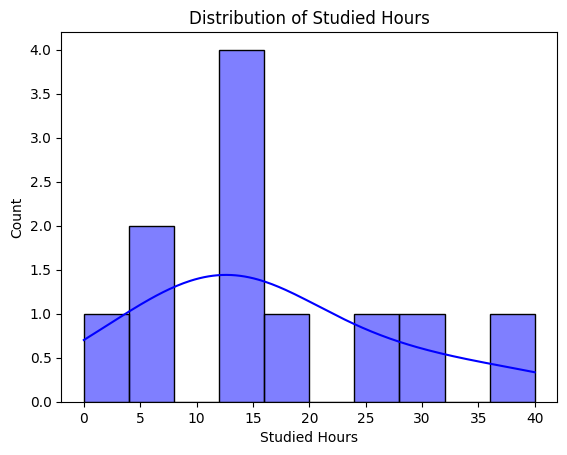

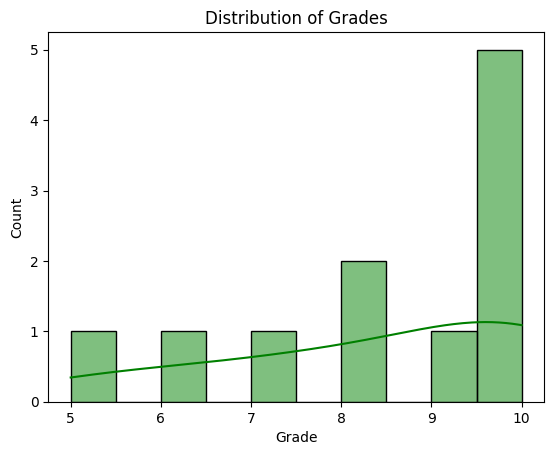

In [ ]:
# Distribution of Studied Hours
sns.histplot(df['Studied_hours'], kde=True, bins=10, color='blue')
plt.title('Distribution of Studied Hours')
plt.xlabel('Studied Hours')
plt.show()

# # Distribution of Grades
sns.histplot(df['Grade'], kde=True, bins=10, color='green')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.show()


In [ ]:
correlation = df['Studied_hours'].corr(df['Grade'])
print(f"Correlation between Studied Hours and Grade: {correlation:.2f}")


Correlation between Studied Hours and Grade: 0.79


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = df[['Studied_hours']]
y = df['Grade']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Studied_hours): {model.coef_[0]}")


Intercept: 5.83890545144804
Coefficient (Studied_hours): 0.17930153321976158


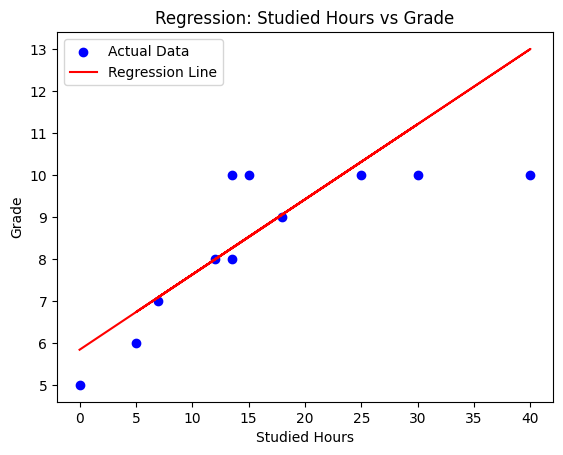

In [ ]:
# Scatterplot with regression line
plt.scatter(df['Studied_hours'], df['Grade'], color='blue', label='Actual Data')
plt.plot(df['Studied_hours'], model.predict(df[['Studied_hours']]), color='red', label='Regression Line')
plt.title('Regression: Studied Hours vs Grade')
plt.xlabel('Studied Hours')
plt.ylabel('Grade')
plt.legend()
plt.show()
